In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('sukses')

sukses


In [2]:
df = pd.read_csv('ecommerce.csv', index_col=0)
df.head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men


## Problem Background and Goals
Seiring berkembangnya teknologi, cara berbisnis pun mengalami perubahan dari bertransaksi secara konvensional, kini masyarakat lebih suka belanja secara online. Kepala Badan Pusat Statistik (BPS) Suhariyanto juga ikut mengakui bahwa fenomena belanja online sedang terjadi di Indonesia, dan salah satu faktornya adalah pertumbuhan e-commerce yang juga semakin pesat. Alasan-alasan mengapa orang beralih ke belanja online adalah hemat waktu dan tenaga, cukup dari rumah, kapanpun kita bisa berbelanja. Tersedianya banyak promo di marketplace juga semakin menarik minat untuk berbelanja. Pilihan metode pembayaran yang beragam. Variasi barang lebih lengkap. Terakhir adalah dapat membandingkan harga barang dengan mudah. https://www.cermati.com/artikel/5-alasan-kenapa-banyak-orang-beralih-ke-belanja-online

Namun seringkali orang yang mau mulai berbisnis online tidak tahu barang apa yang mau ia jual. Berapa harga barang yang ingin dijual, jika dijual dengan harga segini apakah kemurahan atau kemahalan? Berapa harga yang tepat supaya barang laku dan seller untung bukan malah buntung? Itu adalah beberapa problem yang sering menghantui seller pemula (termasuk saya sendiri). Maka dari itu saya ingin melakukan analisis untuk mengetahui barang apa yang tepat untuk dijual dan berapa harga yang tepat untuk suatu barang.

## Define Problem

1. Kategori barang apa yang laku dijual di e-commerce? Berdasarkan avg persentase barang terjual
2. Setelah tau apa yang laku dijual, next nya adalah berapa harga yang tepat untuk barang tersebut?

## Define Goals

1. Mengetahui kategori barang yang laku dijual di e-commerce, berdasarkan avg persentase barang terjual
2. Menganalisa harga barang untuk mengetahui harga yang tepat untuk menjual barang

## Cek Tipe Data

Cek tipe data bertujuan untuk memastikan tipe data pada tiap kolom sudah tepat, semisal kolom kategorikal seharusnya bertipe object, kolom numerikal bertipe float/int, kolom tanggal bertipe date/time

In [3]:
df.dtypes

category              object
product               object
Original_price       float64
price                float64
perc_of_unit_sold    float64
rating               float64
shpping_rate          object
gender                object
dtype: object

- Tipe kolomnya sudah tepat semua, tidak ada masalah

## Describe Data

Describe data bertujuan untuk melihat pola deskriptif data secara lebih detail

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Original_price,583.0,864.498113,1803.365527,42.0,273.00,499.00,980.00,29970.0
price,609.0,339.434039,285.416406,21.4,140.98,262.49,444.99,3220.0
perc_of_unit_sold,522.0,57.678161,25.434947,2.0,36.25,60.00,79.00,99.0
rating,427.0,87.807963,11.422350,20.0,82.00,88.00,96.00,100.0


In [5]:
df.describe(include='object').T

,count,unique,top,freq
category,609,7,Watches,180
product,609,602,Lacoste Casual Shoe for Men Size 44 EU - White,3
shpping_rate,567,2,FREE Shipping,356
gender,581,3,men,338


## Cek Missing Value

In [6]:
df.isna().sum()

category               0
product                0
Original_price        26
price                  0
perc_of_unit_sold     87
rating               182
shpping_rate          42
gender                28
dtype: int64

In [7]:
round((((df.isnull().sum()) / (len(df))) * 100), 2)

category              0.00
product               0.00
Original_price        4.27
price                 0.00
perc_of_unit_sold    14.29
rating               29.89
shpping_rate          6.90
gender                4.60
dtype: float64

- Jika dilihat dari persentase, tidak ada kolom dgn missing value yg mencapai 50% atau lebih. Semuanya masih dibawah 50% bahkan 30%, untuk selanjutnya akan ditelaah lagi untuk handling nya

## Handling Missing Value

In [8]:
df['Original_price'].describe()

count      583.000000
mean       864.498113
std       1803.365527
min         42.000000
25%        273.000000
50%        499.000000
75%        980.000000
max      29970.000000
Name: Original_price, dtype: float64

In [9]:
# Cek Outliers di Original_price

IQR = 980 - 273
lower_fence = 273 - (1.5 * IQR)
upper_fence = 980 + (1.5 * IQR)
df[(df['Original_price'] < lower_fence) | (df['Original_price'] > upper_fence)].head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
140,Eyewear,"Bottega Veneta Sunglasses For Unisex, Bv0013S-...",2094.0,1175.99,14.0,NaN,FREE Shipping,Unisex
2,Watches,JBW Mondrian Women's 16 Diamonds Rose Gold Dia...,2990.0,564.98,94.0,88.0,FREE Shipping,women
6,Watches,JBW 562 Men's 12 Diamonds Gold Dial Gold-Plate...,2749.0,1230.00,NaN,76.0,NaN,men
21,Watches,"Burberry Watch For Men,Stainless Steel Band, Q...",2865.0,1196.49,91.0,90.0,FREE Shipping,men
26,Watches,Akribos XXIV Men's Silver Dial Stainless Steel...,2610.0,209.49,81.0,100.0,FREE Shipping,men


- Karena di kolom Original_price terdapat beberapa outliers maka missing value akan di fill dengan median

In [10]:
df['Original_price'].fillna(df['Original_price'].median(), inplace=True)

In [11]:
df['perc_of_unit_sold'].describe()

count    522.000000
mean      57.678161
std       25.434947
min        2.000000
25%       36.250000
50%       60.000000
75%       79.000000
max       99.000000
Name: perc_of_unit_sold, dtype: float64

In [12]:
## Cek outliers di perc_of_unit_sold

IQR = 79 - 36.25
lower_fence = 36.25 - (1.5 * IQR)
upper_fence = 79 + (1.5 * IQR)
df[(df['perc_of_unit_sold'] < lower_fence) | (df['perc_of_unit_sold'] > upper_fence)].head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender


- di kolom perc_of_unit_sold tidak ada outliers. Maka missing value akan diisi dengan mean

In [13]:
df['perc_of_unit_sold'].fillna(df['perc_of_unit_sold'].mean(), inplace=True)

In [14]:
df['rating'].describe()

count    427.000000
mean      87.807963
std       11.422350
min       20.000000
25%       82.000000
50%       88.000000
75%       96.000000
max      100.000000
Name: rating, dtype: float64

In [15]:
## Cek outliers di rating

IQR = 96 - 82
lower_fence = 82 - (1.5 * IQR)
upper_fence = 96 + (1.5 * IQR)
df[(df['rating'] < lower_fence) | (df['rating'] > upper_fence)].head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
17,Eyewear,"Polaroid Sunglasses , for Women , Mixed , Avia...",201.0,129.49,22.000000,60.0,Eligible for FREE Shipping,women
63,Eyewear,Lacoste Men's Sunglasses Rectangular Petit Piq...,793.0,442.48,50.000000,20.0,FREE Shipping,men
69,Eyewear,Emporio Armani Square Sunglasses For Men - Blu...,780.0,359.49,57.678161,60.0,FREE Shipping,men
71,Eyewear,"Polaroid Sunglasses For Men Pld 1016/Sdl550Lb,...",200.0,134.99,51.000000,60.0,Eligible for FREE Shipping,men
91,Eyewear,Polaroid Sunglasses For Unisex Pld 2061/S00350...,250.0,179.49,52.000000,56.0,Eligible for FREE Shipping,Unisex


- Karena di kolom rating terdapat beberapa outliers maka missing value akan di fill dengan median

In [16]:
df['rating'].fillna(df['rating'].median(), inplace=True)

In [17]:
df.shpping_rate.describe()

count               567
unique                2
top       FREE Shipping
freq                356
Name: shpping_rate, dtype: object

- Karena kolom 'shpping_rate' dirasa berguna untuk analisis maka tidak di drop tapi diisi dengan most frequent value

In [18]:
df['shpping_rate'].fillna('FREE Shipping', inplace=True)

In [19]:
df.gender.describe()

count     581
unique      3
top       men
freq      338
Name: gender, dtype: object

In [20]:
df['gender'].fillna('men', inplace=True)

- Karena kolom 'gender' dirasa berguna untuk analisis maka tidak di drop tapi diisi dengan most frequent value

In [21]:
df.isna().sum()

category             0
product              0
Original_price       0
price                0
perc_of_unit_sold    0
rating               0
shpping_rate         0
gender               0
dtype: int64

## Analisis

### Buat kolom n_diskon dan %_diskon

In [22]:
df['n_diskon'] = df['Original_price'] - df['price']  # get besaran diskon
df['%_diskon'] = round((df['n_diskon'] / df['Original_price']) * 100)

In [23]:
df.head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender,n_diskon,%_diskon
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men,87.52,29.0
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men,59.01,17.0
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,88.0,FREE Shipping,women,81.52,19.0
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men,107.52,34.0
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,88.0,Eligible for FREE Shipping,men,64.01,25.0


### Kategori barang yang laku dijual di e-commerce, Berdasarkan avg persentase barang terjual

In [24]:
pd.crosstab(index=df['category'], columns='avg % unit sold', values=df['perc_of_unit_sold'], aggfunc='mean').sort_values('avg % unit sold', ascending=False)

col_0,avg % unit sold
category,
Perfumes & Fragrances,73.793651
Athletic Shoes,62.313854
Watches,61.144572
Casual & Dress Shoes,53.471020
Sportswear,52.133055
Eyewear,49.768025
Wallets,44.685306


- Perfumes & Fragrances adalah kategori dengan avg % unit sold tertinggi

In [25]:
parfum = df[df['category'] == 'Perfumes & Fragrances']

- Next kita cek jumlah parfum yang ada di dataset ini

In [54]:
pd.crosstab(index=[parfum['category'], parfum['gender']], columns='jumlah')

col_0                         jumlah
category              gender        
Perfumes & Fragrances Unisex       5
                      men         25
                      women       33

### 10 parfum dengan % unit sold tertinggi

In [41]:
pd.crosstab(index=[parfum['category'], parfum['product'], parfum['gender'], parfum['Original_price'], parfum['price']], columns='% barang terjual', values=parfum['perc_of_unit_sold'], aggfunc='mean').sort_values('% barang terjual', ascending=False).head(10)

col_0                                                                                                  % barang terjual
category              product                                            gender Original_price price                   
Perfumes & Fragrances Mancera Roses Vanille for Unisex - Eau de Parfu... Unisex 415.0          197.98              99.0
                      Burberry London for Women - Eau de Parfum, 100ml   women  252.0          127.97              98.0
                      Calvin Klein Euphoria Intense for Men - Eau de ... men    282.0          84.09               98.0
                      Eternity by Calvin Klein for Men - Eau de Toile... men    322.0          83.90               97.0
                      Calvin Klein Beauty for Women - Eau de Parfum, ... women  357.0          84.98               97.0
                      Oud Sharqia for Unisex - Eau de Parfum, 80ml       Unisex 157.0          22.00               96.0
                      Nikos Sculpture Homme for Men - Eau de Toilette... men    250.0          49.95               95.0
                      Davidoff The Game for Men - Eau de Toilette, 100ml men    252.0          81.62               95.0
                      Davidoff Cool Water For Men - Eau de Toilette, ... men    294.0          69.90               95.0
                      Jovan Musk for Women - Eau de Cologne, 59ml        women  42.0           21.40               93.0

- Parfum untuk unisex dengan % unit sold tertinggi adalah Mancera Roses Vanille 120ml
- Parfum untuk wanita dengan % unit sold tertinggi adalah Burberry London 100ml
- Parfum untuk pria dengan % unit sold tertinggi adalah Calvin Klein Euphoria Intense for Men 100ml
- 5 dari 10 parfum dengan % unit sold tertinggi adalah parfum pria
- Untuk brand, yang mendominasi adalah Calvin Klein dan Davidoff

Next, coba kita gali korelasi antara 'Original_price', 'price', dan 'perc_of_unit_sold'

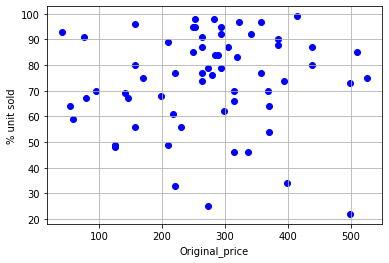

In [46]:
plt.scatter(parfum['Original_price'], parfum['perc_of_unit_sold'], c='b')
plt.xlabel('Original_price')
plt.ylabel('% unit sold')
plt.grid(True)
plt.show()

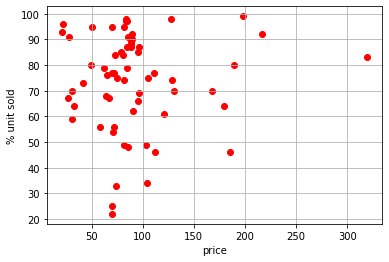

In [47]:
plt.scatter(parfum['price'], parfum['perc_of_unit_sold'], c='r')
plt.xlabel('price')
plt.ylabel('% unit sold')
plt.grid(True)
plt.show()

In [30]:
df.corr().round(2)

,Original_price,price,perc_of_unit_sold,rating,n_diskon,%_diskon
Original_price,1.00,0.70,0.04,-0.11,0.99,0.28
price,0.70,1.00,-0.12,-0.03,0.60,-0.06
perc_of_unit_sold,0.04,-0.12,1.00,0.09,0.06,0.10
rating,-0.11,-0.03,0.09,1.00,-0.12,-0.16
n_diskon,0.99,0.60,0.06,-0.12,1.00,0.33
%_diskon,0.28,-0.06,0.10,-0.16,0.33,1.00


- Dari plot pertama menunjukkan korelasi positif yang sangat lemah antara 'Original_price' dan '% unit sold' sebesar 0.04
- Dari plot kedua menunjukkan korelasi negatif yang lemah antara 'price' dan '% unit sold' sebesar -0.12
- Dari plot ketiga menunjukkan korelasi positif yang sangat lemah antara 'rating' dan '% unit sold' 0.09

### Average harga parfum based on gender

In [53]:
pd.crosstab(index=[parfum['category'], parfum['gender']], columns='avg price', values=parfum['price'], aggfunc='mean').round()

col_0                         avg price
category              gender           
Perfumes & Fragrances Unisex       67.0
                      men          78.0
                      women       106.0

- Average price yang paling tinggi adalah parfum wanita
- Average price yang paling rendah adalah parfum unisex

### 10 Parfum dengan harga terendah

In [31]:
pd.crosstab(index=[parfum['category'], parfum['product'], parfum['gender'], parfum['perc_of_unit_sold']], columns='harga min', values=parfum['Original_price'], aggfunc='min').sort_values('harga min').head(10)

col_0                                                                                              harga min
category              product                                            gender perc_of_unit_sold           
Perfumes & Fragrances Jovan Musk for Women - Eau de Cologne, 59ml        women  93.0                    42.0
                      Lattafa Pure Musk for Unisex - Eau de Parfum, 1... Unisex 64.0                    55.0
                      Brown Orchid for Men - Eau de Parfum, 80ml         men    59.0                    59.0
                      United Colors Of Benetton Hot Gold for Women - ... women  91.0                    77.0
                      United Colors Of Benetton Hot for Women - Eau d... women  67.0                    79.0
                      Sheikh Al Shuyukh by Lattafa for Unisex - Eau d... Unisex 70.0                    95.0
                      Fantasy by Britney Spears for Women - Eau de Pa... women  48.0                   125.0
                      Joop! Homme for Men - Eau de Toilette, 125ml       men    49.0                   126.0
                      S.T.Dupont for Women - Eau de Parfum, 100ml        women  69.0                   141.0
                      Guess by Marciano for Women - Eau de Parfum, 100ml women  67.0                   147.0

- Parfum termurah untuk wanita adalah Jovan Musk Eau de Cologne 59ml
- Parfum termurah untuk pria adalah Brown Orchid Eau de Parfum 80ml
- Parfum termurah untuk unisex adalah Lattafa Pure Musk Eau de Parfum 100ml
- 6 dari 10 parfum termurah adalah parfum untuk wanita
- Dari 10 parfum ini, parfum dengan % unit sold tinggi adalah Jovan Musk for Women - Eau de Cologne, 59ml dan United Colors Of Benetton Hot Gold for Women - Eau de Toilette , 100ml dengan % di-atas 90%

### 10 Parfum dengan harga tertinggi

In [32]:
pd.crosstab(index=[parfum['category'], parfum['product'], parfum['gender'], parfum['perc_of_unit_sold']], columns='harga max', values=parfum['Original_price'], aggfunc='max').sort_values('harga max', ascending=False).head(10)

col_0                                                                                              harga max
category              product                                            gender perc_of_unit_sold           
Perfumes & Fragrances Roberto Cavalli For Women - Eau de Parfum, 75ml    women  75.0                   525.0
                      Roberto Cavalli Paradiso for Women - Eau de Par... women  85.0                   510.0
                      Fatale by Agent Provocateur for Women - Eau de ... women  22.0                   499.0
                      Sheikh Al Shuyukh Luxe Edition For Men, Eau De ... men    73.0                   499.0
                      MONTALE Roses Musk for Women - Eau de Parfum, 1... women  80.0                   439.0
                      Fendi Furiosa for Women - Eau de Parfum, 50ml      women  87.0                   439.0
                      Mancera Roses Vanille for Unisex - Eau de Parfu... Unisex 99.0                   415.0
                      Brit Rhythm by Burberry for Men - Eau de Toilet... men    34.0                   399.0
                      Calvin Klein Ck One Shock for Men - Eau de Toil... men    74.0                   394.0
                      Tommy Girl By Tommy Hilfiger For Women - Eau De... women  88.0                   385.0

- Parfum termahal untuk wanita adalah Roberto Cavalli - Eau de Parfum, 75ml
- Parfum termahal untuk pria adalah Sheikh Al Shuyukh Luxe Edition, Eau De Parfum, 100 ml
- Parfum termahal untuk unisex adalah Mancera Roses Vanille - Eau de Parfum, 120ml
- 6 dari 10 parfum dengan harga tertinggi adalah parfum untuk wanita
- Dari 10 parfum ini, parfum dengan % unit sold tertinggi adalah Mancera Roses Vanille for Unisex - Eau de Parfum, 120ml dengan % lebih dari 90%

### 10 parfum dengan diskon terbesar

In [40]:
pd.crosstab(index=[parfum['category'], parfum['product'], parfum['gender'], parfum['perc_of_unit_sold'], parfum['Original_price'], parfum['price']], columns='%_diskon', values=parfum['%_diskon'], aggfunc='max').sort_values('%_diskon', ascending=False).head(10)

col_0                                                                                                                    %_diskon
category              product                                            gender perc_of_unit_sold Original_price price           
Perfumes & Fragrances Sheikh Al Shuyukh Luxe Edition For Men, Eau De ... men    73.0              499.0          41.61       92.0
                      Fatale by Agent Provocateur for Women - Eau de ... women  22.0              499.0          69.59       86.0
                      Oud Sharqia for Unisex - Eau de Parfum, 80ml       Unisex 96.0              157.0          22.00       86.0
                      Roberto Cavalli Paradiso for Women - Eau de Par... women  85.0              510.0          95.88       81.0
                      Davidoff Champion for Men - Eau de Toilette, 90ml  men    54.0              370.0          70.98       81.0
                      Nikos Sculpture Homme for Men - Eau de Toilette... men    95.0              250.0          49.95       80.0
                      Roberto Cavalli For Women - Eau de Parfum, 75ml    women  75.0              525.0          105.22      80.0
                      Davidoff Hot Water for Men - Eau de Toilette, 1... men    79.0              294.0          61.79       79.0
                      Calvin Klein Ck One Shock for Men - Eau de Toil... men    74.0              394.0          81.98       79.0
                      Fendi Furiosa for Women - Eau de Parfum, 50ml      women  87.0              439.0          96.09       78.0

- Parfum wanita dengan diskon terbesar adalah Fatale by Agent Provocateur - Eau de Parfum, 50ml
- Parfum pria dengan diskon terbesar adalah heikh Al Shuyukh Luxe Edition - Eau De Parfum, 100 ml
- Parfum unisex dengan diskon terbesar adalah Oud Sharqia - Eau de Parfum, 80ml
- Diskon terbesar parfum tercatat 92%, ini sih hampir gratis, tapi memang harga aslinya mahal juga. Parfum tersebut termasuk kedalam 10 parfum dengan harga tertinggi

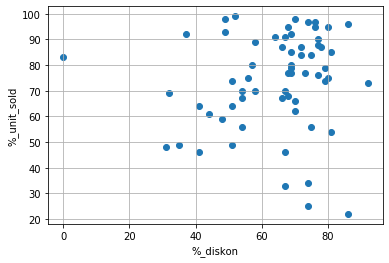

In [45]:
plt.scatter(parfum['%_diskon'], parfum['perc_of_unit_sold'])
plt.xlabel('%_diskon')
plt.ylabel('%_unit_sold')
plt.grid(True)
plt.show()

In [44]:
df.corr().round(2)

,Original_price,price,perc_of_unit_sold,rating,n_diskon,%_diskon
Original_price,1.00,0.70,0.04,-0.11,0.99,0.28
price,0.70,1.00,-0.12,-0.03,0.60,-0.06
perc_of_unit_sold,0.04,-0.12,1.00,0.09,0.06,0.10
rating,-0.11,-0.03,0.09,1.00,-0.12,-0.16
n_diskon,0.99,0.60,0.06,-0.12,1.00,0.33
%_diskon,0.28,-0.06,0.10,-0.16,0.33,1.00


- Ternyata ada korelasi antara %_diskon dan %_unit_sold sebesar 0.1, bukan korelasi yang kuat. Visualnya bisa dilihat di scatter plot, perfume dengan diskon >= 60% kebanyakan punya %_unit_sold di-atas 50%, hanya sedikit yang di-bawah 50%

## Kesimpulan dan Rekomendasi

1. Berdasarkan data, dari seluruh kategori, Perfumes & Fragrances merupakan barang yang paling laris, ditinjau dari rata-rata percentage unit sold nya
2. Parfum dengan % unit sold tertinggi adalah Mancera Roses Vanille for Unisex - Eau de Parfum, 120ml
3. Parfum dengan % unit sold tertinggi didominasi oleh parfum pria bermerek Calvin Klein dan Davidoff
4. Jika seller tidak punya modal yang besar disarankan untuk menjual parfum Jovan Musk for Women - Eau de Cologne, 59ml dan United Colors Of Benetton Hot Gold for Women - Eau de Toilette , 100ml karena parfum-parfum tersebut mempunyai harga yang murah di-bawah 80 USD tetapi punya % unit sold yang tinggi di-atas 90%, sehingga bisa mendapatkan keuntungan maksimal dengan modal yang kecil
5. Jika seller punya modal yang besar disarankan untuk menjual Mancera Roses Vanille for Unisex - Eau de Parfum, 120ml, Burberry London for Women - Eau de Parfum, 100ml, Calvin Klein Euphoria Intense for Men - Eau de Toilette, 100ml karena walaupun parfum-parfum tersebut punya harga yang tinggi tetapi % unit sold nya juga tinggidi-atas 95%